In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

from tools import preprocesamiento

## Cargar y preprocesar los datos

In [ ]:
X_train, X_test, y_train, y_test, X_candidate = preprocesamiento(path='K2.csv', dataset='k2')

## Definir el modelo

In [ ]:
model = tf.keras.Sequential([
    layers.Dense(32, input_shape=(X_train.shape[1],)),
    layers.Activation('relu'),

    layers.Dense(16),
    layers.Activation('relu'),
    layers.BatchNormalization(),

    layers.Dense(1),
    layers.Activation('sigmoid')
])

c:\Users\yamil\miniconda3\envs\ml\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,273 (8.88 KB)

 Trainable params: 2,241 (8.75 KB)

 Non-trainable params: 32 (128.00 B)

## Compilar y entrenar el modelo

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.0005),
              metrics=['accuracy'])

In [6]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32)

Epoch 1/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4735 - loss: 0.8469 - val_accuracy: 0.6514 - val_loss: 0.6308
Epoch 2/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6579 - loss: 0.6301 - val_accuracy: 0.7277 - val_loss: 0.5836
Epoch 3/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7810 - loss: 0.5164 - val_accuracy: 0.8061 - val_loss: 0.5100
Epoch 4/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8513 - loss: 0.4457 - val_accuracy: 0.8780 - val_loss: 0.4268
Epoch 5/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8966 - loss: 0.3827 - val_accuracy: 0.9259 - val_loss: 0.3480
Epoch 6/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9339 - loss: 0.3259 - val_accuracy: 0.9521 - val_loss: 0.2805
Epoch 7/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9535 - loss: 0.2733 - val_accuracy: 0.9673 - val_loss: 0.2244
Epoch 8/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9669 - loss: 0.2230 - val_accuracy: 0.9826 - val_loss:

## Evaluar el modelo

In [ ]:
def calcular_metricas(model, X, y):
    #Probabilidades predichas
    y_prob = model.predict(X, verbose=0).flatten()

    #Predicción de clase
    y_pred = (y_prob > 0.5).astype(int)
    y_true = y.flatten() if y.ndim > 1 else y

    CM = confusion_matrix(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    roc_auc = roc_auc_score(y_true, y_prob)

    return CM, accuracy, precision, recall, f1, roc_auc


def evaluar_modelo(model, X_train, y_train, X_test, y_test):
    cm_train, acc_train, prec_train, rec_train, f1_train, roc_train = calcular_metricas(model, X_train, y_train)
    cm_test, acc_test, prec_test, rec_test, f1_test, roc_test = calcular_metricas(model, X_test, y_test)

    clases = ['FALSE POSITIVE', 'CONFIRMED']

    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    sns.heatmap(cm_train, annot=True, fmt='d', cmap='BuPu',
                xticklabels=clases, yticklabels=clases,
                ax=ax[0], annot_kws={'size': 10})
    ax[0].set_title('K2 - Train', fontsize=14)
    ax[0].set_xlabel('Predicho', fontsize=12)
    ax[0].set_ylabel('Real', fontsize=12)
    ax[0].tick_params(labelsize=11)
    ax[0].text(0.45, -0.12, f'\nAccuracy: {acc_train:.4f} | Precisión: {prec_train:.4f}\nRecall: {rec_train:.4f} | F1-Score: {f1_train:.4f}\nROC-AUC: {roc_train:.4f}',
            transform=ax[0].transAxes, ha='center', fontsize=11, va='top')

    sns.heatmap(cm_test, annot=True, fmt='d', cmap='BuPu',
                xticklabels=clases, yticklabels=clases,
                ax=ax[1], annot_kws={'size': 10})
    ax[1].set_title('K2 - Test', fontsize=14)
    ax[1].set_xlabel('Predicho', fontsize=12)
    ax[1].set_ylabel('Real', fontsize=12)
    ax[1].tick_params(labelsize=11)
    ax[1].text(0.45, -0.12, f'\nAccuracy: {acc_test:.4f} | Precisión: {prec_test:.4f}\nRecall: {rec_test:.4f} | F1-Score: {f1_test:.4f}\nROC-AUC: {roc_test:.4f}',
            transform=ax[1].transAxes, ha='center', fontsize=11, va='top')

    plt.tight_layout()
    plt.subplots_adjust(wspace=0.25) 
    plt.savefig('CM_k2.png', dpi=300, bbox_inches='tight')
    plt.show()

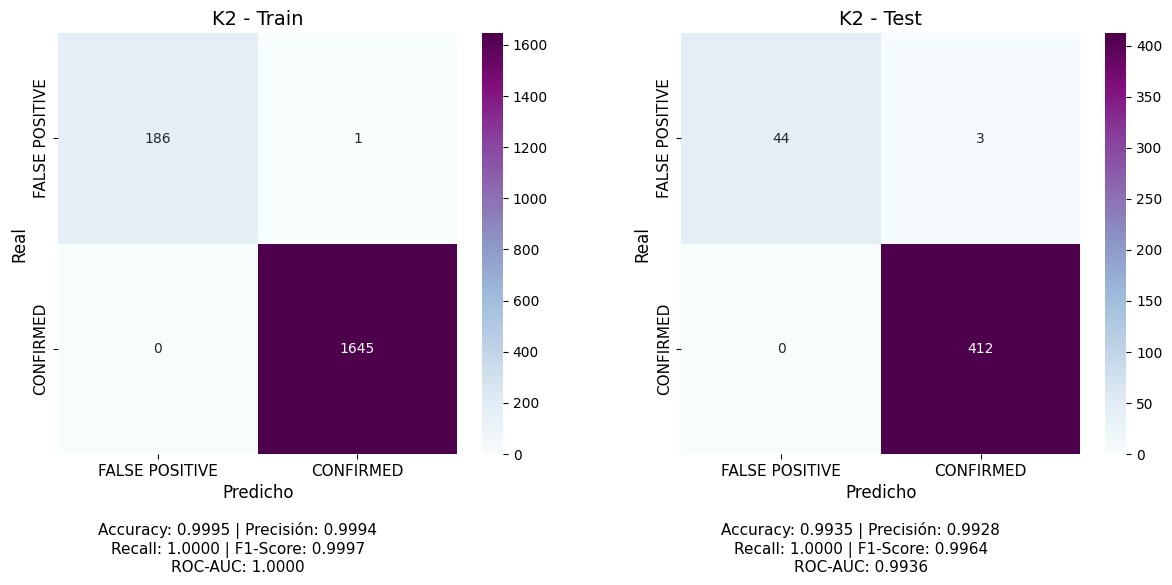

In [8]:
evaluar_modelo(model, X_train, y_train, X_test, y_test)

## Realizar predicciones para los candidatos

In [ ]:
def predecir_exoplanetas(model, X):
    prob_confirmed = model.predict(X).flatten() #Probabilidad de ser CONFIRMED
    prob_fp = 1 - prob_confirmed #Probabilidad de ser FALSE POSITIVE
    
    #Predicciones
    preds = (prob_confirmed >= 0.5).astype(int)
    clases = {0: 'FALSE POSITIVE', 1: 'CONFIRMED'}
    predicciones = np.array([clases[p] for p in preds])

    return prob_fp, prob_confirmed, predicciones

In [10]:
prob_fp, prob_conf, predicciones = predecir_exoplanetas(model, X_candidate)
for i in range(X_candidate.shape[0]):
    if predicciones[i] == 'FALSE POSITIVE':
        print(f'Clase predicha: {predicciones[i]}, Probabilidad: {prob_fp[i]:.4f}')
    else:
        print(f'Clase predicha: {predicciones[i]}, Probabilidad: {prob_conf[i]:.4f}')

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Clase predicha: CONFIRMED, Probabilidad: 0.5052
Clase predicha: CONFIRMED, Probabilidad: 0.7931
Clase predicha: CONFIRMED, Probabilidad: 0.9954
Clase predicha: CONFIRMED, Probabilidad: 0.8908
Clase predicha: CONFIRMED, Probabilidad: 0.6625
Clase predicha: CONFIRMED, Probabilidad: 0.8804
Clase predicha: CONFIRMED, Probabilidad: 0.5792
Clase predicha: FALSE POSITIVE, Probabilidad: 0.9959
Clase predicha: CONFIRMED, Probabilidad: 0.9914
Clase predicha: CONFIRMED, Probabilidad: 0.9017
Clase predicha: FALSE POSITIVE, Probabilidad: 0.9281
Clase predicha: FALSE POSITIVE, Probabilidad: 0.9382
Clase predicha: CONFIRMED, Probabilidad: 0.7108
Clase predicha: FALSE POSITIVE, Probabilidad: 0.8936
Clase predicha: CONFIRMED, Probabilidad: 0.9569
Clase predicha: CONFIRMED, Probabilidad: 0.9781
Clase predicha: CONFIRMED, Probabilidad: 0.9786
Clase predicha: FALSE POSITIVE, Probabilidad: 0.9412
Clase predicha: FALSE POSITIVE, Probabilidad: 0.9298
Clase predicha: FA

## Guardar el modelo

In [11]:
model.save('modelo_red_k2.h5')

In [12]:
model.export('modelo_k2')

INFO:tensorflow:Assets written to: modelo_k2\assets


INFO:tensorflow:Assets written to: modelo_k2\assets


Saved artifact at 'modelo_k2'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 51), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  2532742228944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2532742230096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2532742228752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2532742228368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2532742227408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2532742231056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2532742229328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2532742230672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2532742229520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2532742231824: TensorSpec(shape=(), dtype=tf.resource, name=None)
